   SnackID      SnackName  MinAge  MaxAge DietaryPreference  Calories
0        1   Apple Slices       2      12        Vegetarian        52
1        2  Carrot Sticks       2      12        Vegetarian        25
2        3         Yogurt       2      12        Vegetarian       100
3        4    Granola Bar       4      12        Vegetarian       150
4        5         Banana       2      12        Vegetarian        89
    SnackID             SnackName  MinAge  MaxAge DietaryPreference  Calories
17       18         Celery Sticks       2      12             Vegan        10
15       16            Rice Cakes       4      12             Vegan        35
7         8               Berries       2      12             Vegan        50
10       11  Whole Wheat Crackers       4      12             Vegan        70
13       14           Fruit Salad       2      12             Vegan        70


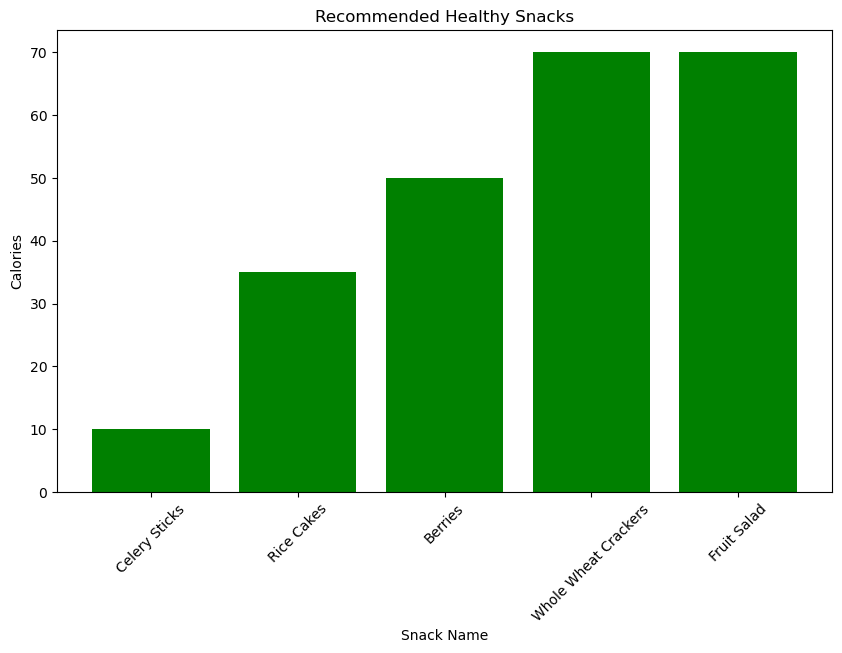

In [1]:
# Healthy Snack Recommendation System for UK Kids_Palanichamy Naveen
# 1. Setting up the Environment

#pip install pandas numpy sklearn

#2. Creating the Dataset 

import pandas as pd

# Create a synthetic dataset
data = {
    'SnackID': range(1, 21),
    'SnackName': ['Apple Slices', 'Carrot Sticks', 'Yogurt', 'Granola Bar', 'Banana', 
                  'Mixed Nuts', 'Oatmeal', 'Berries', 'Smoothie', 'Cheese Cubes', 
                  'Whole Wheat Crackers', 'Hummus and Veggies', 'Popcorn', 'Fruit Salad', 
                  'Trail Mix', 'Rice Cakes', 'Peanut Butter', 'Celery Sticks', 'Boiled Egg', 'Pita Bread'],
    'MinAge': [2, 2, 2, 4, 2, 5, 2, 2, 3, 3, 4, 4, 5, 2, 5, 4, 5, 2, 3, 4],
    'MaxAge': [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
    'DietaryPreference': ['Vegetarian', 'Vegetarian', 'Vegetarian', 'Vegetarian', 'Vegetarian', 
                          'Vegan', 'Vegetarian', 'Vegan', 'Vegetarian', 'Vegetarian', 
                          'Vegan', 'Vegan', 'Vegan', 'Vegan', 'Vegan', 'Vegan', 'Vegetarian', 
                          'Vegan', 'Vegetarian', 'Vegan'],
    'Calories': [52, 25, 100, 150, 89, 200, 150, 50, 120, 80, 70, 180, 90, 70, 200, 35, 190, 10, 70, 160]
}

snacks_df = pd.DataFrame(data)

print(snacks_df.head())

# 3. Building the Recommendation System - content-based filtering

def recommend_snacks(age, dietary_preference, num_recommendations=5):
    # Filter snacks based on age suitability
    suitable_snacks = snacks_df[(snacks_df['MinAge'] <= age) & (snacks_df['MaxAge'] >= age)]
    
    # Further filter based on dietary preference
    preferred_snacks = suitable_snacks[suitable_snacks['DietaryPreference'] == dietary_preference]
    
    # Sort by Calories and select top recommendations
    recommended_snacks = preferred_snacks.sort_values(by='Calories').head(num_recommendations)
    
    return recommended_snacks

# Example usage
age = 5
dietary_preference = 'Vegan'
recommendations = recommend_snacks(age, dietary_preference)

print(recommendations)

# 4. Visualizing the Recommendations

import matplotlib.pyplot as plt

def visualize_recommendations(recommendations):
    plt.figure(figsize=(10, 6))
    plt.bar(recommendations['SnackName'], recommendations['Calories'], color='green')
    plt.xlabel('Snack Name')
    plt.ylabel('Calories')
    plt.title('Recommended Healthy Snacks')
    plt.xticks(rotation=45)
    plt.show()

# Visualize the recommendations
visualize_recommendations(recommendations)